<Figure size 1000x400 with 0 Axes>

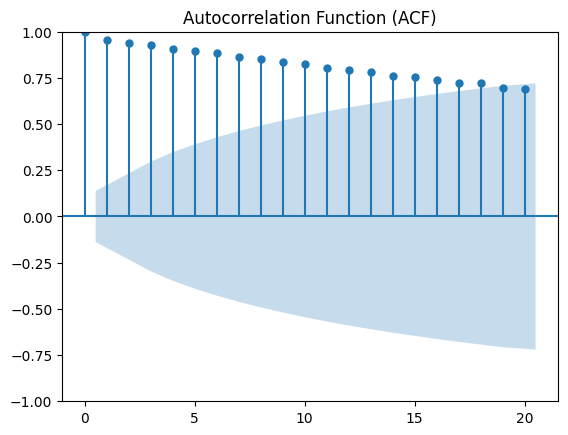

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  180
Model:                    AutoReg(15)   Log Likelihood                -505.757
Method:               Conditional MLE   S.D. of innovations              5.188
Date:                Thu, 11 Dec 2025   AIC                           1045.514
Time:                        09:14:28   BIC                           1098.316
Sample:                            15   HQIC                          1066.948
                                  180                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5396      1.097      3.227      0.001       1.390       5.690
y.L1           0.1337      0.078      1.719      0.086      -0.019       0.286
y.L2           0.0798      0.078      1.026      0.3

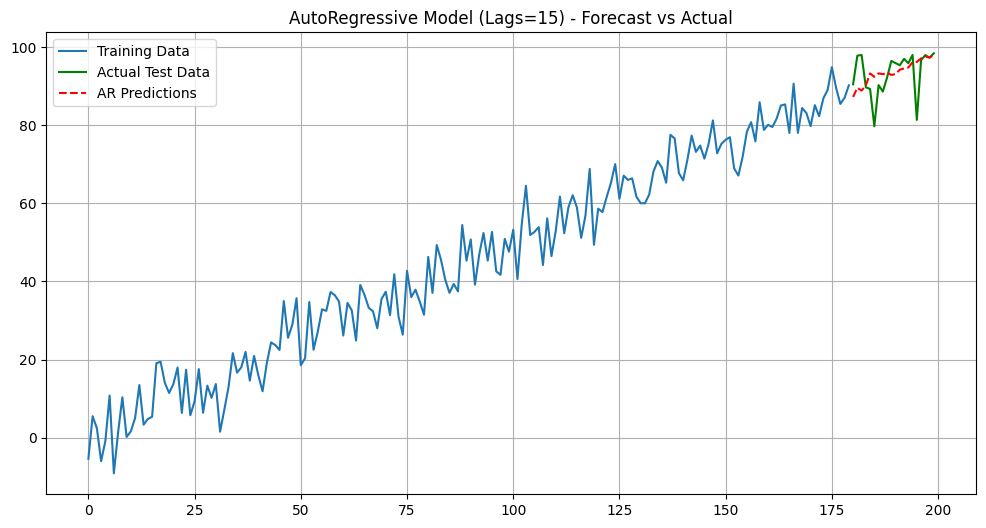

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf

# 1. Data Generation
# I'm creating a synthetic dataset here to simulate a time series with some trend and noise.
# This helps me test the model in a controlled environment.
np.random.seed(123)
data_length = 200
time_index = np.arange(data_length)
# Create a linear trend + random noise
data = 0.5 * time_index + np.random.normal(0, 5, size=data_length)

# Convert to pandas Series for easier handling with statsmodels
series = pd.Series(data, index=time_index)

# 2. Visualizing Autocorrelation
# Before modeling, I want to check if the data actually correlates with its past values.
# The ACF plot helps me see the strength of the relationship at different lags.
plt.figure(figsize=(10, 4))
plot_acf(series, lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# 3. Train/Test Split
# I'll use the last 20 points for testing to see how well the model generalizes to "unseen" future data.
train_size = len(series) - 20
train_data, test_data = series[:train_size], series[train_size:]

# 4. Model Training
# I am selecting a lag of 15 based on the ACF plot (assuming correlation drops off afterwards).
# This means the model looks at the previous 15 time steps to predict the next one.
lag_value = 15
model = AutoReg(train_data, lags=lag_value)
model_fitted = model.fit()

# Print out the summary to check coefficients and significance
print(model_fitted.summary())

# 5. Prediction
# I'm forecasting values for the duration of the test set.
start_index = len(train_data)
end_index = len(train_data) + len(test_data) - 1
predictions = model_fitted.predict(start=start_index, end=end_index, dynamic=False)

# 6. Visualization of Results
# Finally, I'm plotting the Training data, the Actual Test data, and my Model's Predictions
# to visually assess performance.
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Test Data', color='green')
plt.plot(test_data.index, predictions, label='AR Predictions', color='red', linestyle='--')
plt.title(f'AutoRegressive Model (Lags={lag_value}) - Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.show()